In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [3]:
dataset_dir = (r"C:\Users\RUTUJA\Desktop\Rutuja\caltech-101")
dataset_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

batch_size = 2000
dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 9144 images belonging to 102 classes.


In [5]:
x_train, y_train =  dataset_generator[0]
x_test, y_test = dataset_generator[1]

print(len(x_train))
print(len(x_test))

2000
2000


In [7]:
# a. loada a pre-trained CNN model on a large dataset
weights_path = (r"C:\Users\RUTUJA\Desktop\rutuja1\vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5")
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))

In [9]:
#b. Freeze parameter in model lower convoultional layer
for layer in base_model.layers:
   layer.trainable = False

In [11]:
#c. add custom classifier with several layers of trainable paramneter to model
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
#d. train classifier on training data availble for task
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 139s 4s/step - accuracy: 0.1376 - loss: 4.2407 - val_accuracy: 0.3035 - val_loss: 3.3399
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 136s 4s/step - accuracy: 0.3205 - loss: 3.1293 - val_accuracy: 0.4070 - val_loss: 2.8569
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 117s 4s/step - accuracy: 0.4593 - loss: 2.5742 - val_accuracy: 0.4545 - val_loss: 2.5178
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 119s 4s/step - accuracy: 0.5460 - loss: 2.1003 - val_accuracy: 0.4845 - val_loss: 2.3148
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 116s 4s/step - accuracy: 0.5781 - loss: 1.8815 - val_accuracy: 0.5270 - val_loss: 2.1108
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 119s 4s/step - accuracy: 0.6500 - loss: 1.5754 - val_accuracy: 0.5335 - val_loss: 2.0367
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 119s 4s/step - accuracy: 0.7029 - loss: 1.3313 - val_accuracy: 0.5535 - val_loss: 1.9351
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 120s 4s/step - accuracy: 0.7445 - loss: 1.1911 - val_accuracy: 0.5550 - v

In [15]:
# E. fine-tune hyper paramneter and unfreeze more layers as needed
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))
# freeze all layers first
for layer in base_model.layers:
   layer.trainable = False
# unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers) - 2:]:
   layer.trainable = True
# fine-tuning hyper parameters
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# training fine tuned model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 132s 4s/step - accuracy: 0.2518 - loss: 3.6957 - val_accuracy: 0.4840 - val_loss: 2.3567
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 106s 3s/step - accuracy: 0.5407 - loss: 1.9791 - val_accuracy: 0.5730 - val_loss: 1.8362
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.6842 - loss: 1.2536 - val_accuracy: 0.6105 - val_loss: 1.6230
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.8078 - loss: 0.7537 - val_accuracy: 0.6190 - val_loss: 1.6075
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.8656 - loss: 0.5335 - val_accuracy: 0.6380 - val_loss: 1.5730
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.9291 - loss: 0.2900 - val_accuracy: 0.6420 - val_loss: 1.5971
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.9466 - loss: 0.1992 - val_accuracy: 0.6515 - val_loss: 1.5559
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.9668 - loss: 0.1299 - val_accuracy: 0.6405 - val_los

In [17]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 547ms/step


In [19]:
labels = list(dataset_generator.class_indices.keys())

Preditcted:  ketch
Actual:  ketch


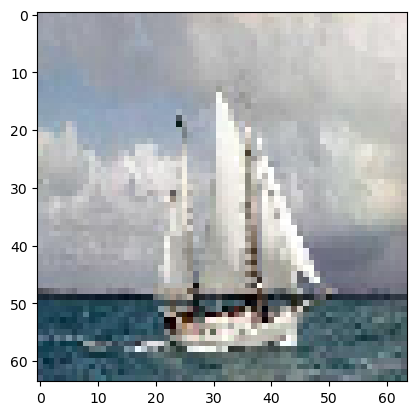

In [21]:
n = 1000
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])